In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
direcotry = 'parsed_data/'
slot_data = direcotry + 'slot_data.csv'
provider_data = direcotry + 'provider_stats.csv'
slot_data = pd.read_csv(slot_data)
provider_data = pd.read_csv(provider_data)

In [3]:
# Convert related_slot_ids and top_provider_slot_ids from string to array
# First, replace empty strings with empty lists for both columns
slot_data['related_slot_ids'] = slot_data['related_slot_ids'].fillna('[]')
slot_data['top_provider_slot_ids'] = slot_data['top_provider_slot_ids'].fillna('[]')
# Convert string representation of lists to actual Python lists for both columns
slot_data['related_slot_ids'] = slot_data['related_slot_ids'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
slot_data['top_provider_slot_ids'] = slot_data['top_provider_slot_ids'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [4]:
provider_data.columns

Index(['provider_name', 'game_count', 'total_rtp', 'rtp_count',
       'total_max_win', 'max_win_count', 'game_types', 'features', 'themes',
       'technologies', 'provider_id', 'avg_rtp', 'avg_max_win'],
      dtype='object')

## Review missing and duplicate values

In [5]:
#check if there are any missing values
for column, missing in slot_data.isnull().sum().items():
    if missing > 0:
        print(f"Missing value in column {column}: {missing}")
for column, missing in provider_data.isnull().sum().items():
    if missing > 0:
        print(f"Missing value in column {column}: {missing}")

#check if there are any duplicates
print("duplicates")
# Create a copy of the dataframe without list columns to check for duplicates
list_columns = ['related_slot_ids', 'top_provider_slot_ids', 'FEATURES', 'THEME', 'TECHNOLOGY', 'OTHER_TAGS', 'OBJECTS', 'GENRE']
slot_data_no_lists = slot_data.drop(columns=[col for col in list_columns if col in slot_data.columns])
provider_data_no_lists = provider_data.drop(columns=[col for col in ['game_types', 'features', 'themes', 'technologies'] if col in provider_data.columns])

print(f"Slot data duplicates: {slot_data_no_lists.duplicated().sum()}")
print(f"Provider data duplicates: {provider_data_no_lists.duplicated().sum()}")

# Check for duplicates in specific key columns
print("\nDuplicates by key columns:")
print(f"Slot IDs: {slot_data['slot_id'].duplicated().sum()}")
print(f"Provider IDs: {provider_data['provider_id'].duplicated().sum() if 'provider_id' in provider_data.columns else 'N/A'}")

Missing value in column review_creation_date: 1
Missing value in column review_update_date: 1
Missing value in column RTP: 3950
Missing value in column MAX_WIN_RELATIVE: 13466
Missing value in column MIN_BET: 2310
Missing value in column MAX_BET: 2429
Missing value in column VARIANCE: 12208
Missing value in column HIT_FREQUENCY: 23343
Missing value in column GAME_SIZE: 17209
Missing value in column TYPE: 1
Missing value in column LAYOUT: 3562
Missing value in column LAST_UPDATE: 1
Missing value in column RELEASE_DATE: 1
Missing value in column avg_rtp: 21
Missing value in column avg_max_win: 80
duplicates
Slot data duplicates: 0
Provider data duplicates: 0

Duplicates by key columns:
Slot IDs: 0
Provider IDs: 0


Once the most important features are identified filling missing values could be cruical for improved results.

In [6]:
# list rows with most missing values and their names in the same row
print("slot_data")
missing_values = slot_data.isnull().sum(axis=1).sort_values(ascending=False).head()
names = slot_data.iloc[missing_values.index]["name"]
print(pd.DataFrame({'Missing Values': missing_values, 'Names': names}))

# list rows with most missing values
print("provider_data")
print(provider_data.isnull().sum(axis=1).sort_values(ascending=False).head())

slot_data
       Missing Values                         Names
27286              13                  High 5 Games
2229                8                Baccarat (XPG)
25669               8            Virtual Drag Races
11389               8  Grand Blackjack (Green Tube)
14207               8     La Loteria Mexicana Bonus
provider_data
540    2
308    2
407    2
193    2
335    2
dtype: int64


High 5 Games is also a provider. Could be an error.

## Exploring slot data

In [7]:
slot_data.columns # exploring expected values for each column would be helpful

Index(['slot_id', 'name', 'url', 'provider', 'provider_url', 'review_text',
       'review_creation_date', 'review_update_date', 'RTP', 'MAX_WIN_RELATIVE',
       'MIN_BET', 'MAX_BET', 'VARIANCE', 'HIT_FREQUENCY', 'GAME_SIZE', 'TYPE',
       'LAYOUT', 'FEATURES', 'THEME', 'TECHNOLOGY', 'OTHER_TAGS', 'OBJECTS',
       'GENRE', 'LAST_UPDATE', 'RELEASE_DATE', 'related_slot_ids',
       'top_provider_slot_ids', 'related_slots_count',
       'top_provider_slots_count'],
      dtype='object')

In [8]:
# Analyze related_slot_ids distribution
print("Distribution of related_slot_ids:")
related_ids_counts = slot_data.related_slot_ids.value_counts().head(20)
print(related_ids_counts)

Distribution of related_slot_ids:
related_slot_ids
[]                                                                              353
[3318, 2541, 1459, 2542, 2544, 2545, 3321, 8905, 2546, 3322, 11978, 13020]       14
[6528, 1623, 6530, 6531, 6533, 6534, 6535, 6536, 6538, 6539, 6540, 6541]         14
[301, 302, 785, 4128, 2233, 2407, 788, 2200, 2408, 276, 2410, 2457]              13
[7670, 3984, 613, 7764, 7729, 2204, 5917, 7439, 7440, 2961, 7295, 2867]          13
[302, 6718, 4701, 14839, 7168, 13569, 795, 3027, 4702, 7160, 4703, 14840]        12
[1187, 1192, 1383, 331, 1193, 1194, 1195, 1384, 1196, 1995, 1197, 1198]          11
[6685, 6686, 6687, 6689, 6690, 9373, 9374, 5905, 5173, 6692, 6693, 6694]         11
[533, 1255, 1256, 536, 537, 538, 1257, 539, 1258, 1259, 1260, 1261]              10
[533, 1255, 1256, 536, 537, 538, 1257, 1258, 539, 1259, 1260, 1261]              10
[857, 858, 859, 861, 862, 860, 863, 864, 865, 866, 867, 868]                      9
[272, 301, 302, 2233, 240

In [ ]:
# Calculate total number of slots with related_slot_ids
total_slots = len(slot_data)
non_empty_slots = [i for i in slot_data.related_slot_ids if i != []]
non_empty_slots_count = len(non_empty_slots)
print(f"Total slots: {total_slots}, Slots with related_slot_ids: {non_empty_slots_count}, Slots missing related_slot_ids: {total_slots - non_empty_slots_count}")

Total slots: 27287, Slots with related_slot_ids: 26934, Slots missing related_slot_ids: 353


Distribution of related slots count:

Basic Statistics:
count    27287.000000
mean         8.409059
std          3.772026
min          0.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         40.000000
Name: related_slot_ids, dtype: float64

Percentage distribution:
related_slot_ids
0      1.293656
1      0.758603
2      0.974823
3      1.909334
4     14.266867
5      3.642760
6      4.111848
7      5.251585
8     32.546634
9      5.313886
10     4.071536
11     3.576795
12     7.981823
13     5.870928
14     3.254297
15     1.711438
16     1.128743
17     0.677979
18     0.513065
19     0.300509
20     0.212555
21     0.150255
22     0.120937
23     0.084289
24     0.073295
25     0.036647
26     0.021988
27     0.018324
28     0.018324
29     0.032983
30     0.010994
31     0.018324
32     0.007329
33     0.014659
34     0.007329
35     0.007329
40     0.007329
Name: count, dtype: float64


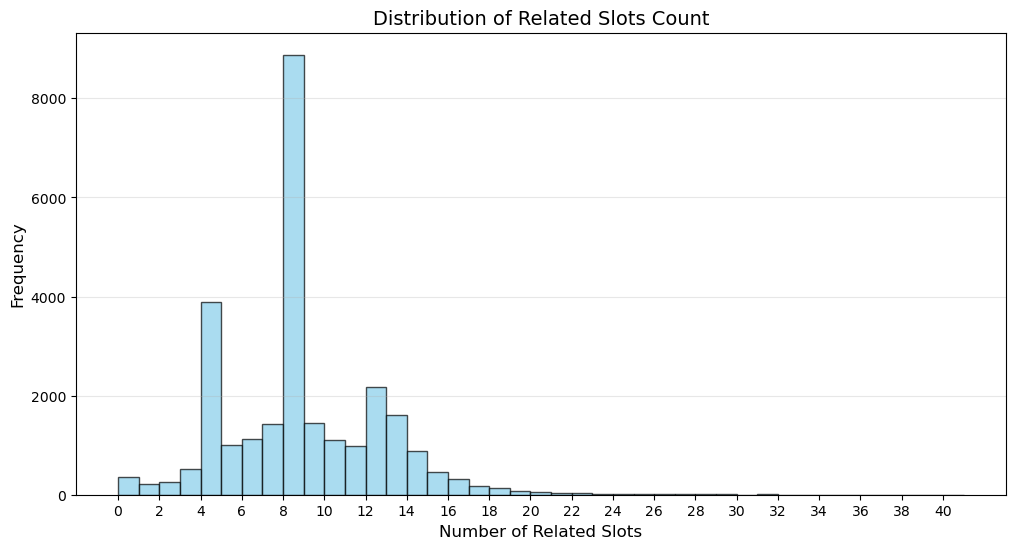


Total unique slot IDs that appear as related slots: 25955

Top 10 most frequently appearing related slots:
Slot ID: 301, Frequency: 431
Slot ID: 276, Frequency: 382
Slot ID: 2408, Frequency: 377
Slot ID: 2410, Frequency: 304
Slot ID: 272, Frequency: 290
Slot ID: 7295, Frequency: 285
Slot ID: 1997, Frequency: 281
Slot ID: 286, Frequency: 273
Slot ID: 5917, Frequency: 247
Slot ID: 2967, Frequency: 245


In [10]:
# Calculate the length of non-empty related slot lists and create distribution analysis
non_empty_counts = slot_data['related_slot_ids'].apply(len)

# Basic distribution statistics
print("Distribution of related slots count:")
print("\nBasic Statistics:")
print(non_empty_counts.describe())

# Calculate percentage of slots with different counts
total_slots = len(slot_data)
count_percentages = (non_empty_counts.value_counts().sort_index() / total_slots * 100)
print("\nPercentage distribution:")
print(count_percentages)

# Plot the distribution as a histogram
plt.figure(figsize=(12, 6))
plt.hist(non_empty_counts, bins=range(0, max(non_empty_counts) + 2), alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Related Slots Count', fontsize=14)
plt.xlabel('Number of Related Slots', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(range(0, max(non_empty_counts) + 2, 2))
plt.show()

# Analyze unique values in related slots
# Get all unique slot IDs that appear in related slots
all_related_slots = set()
for slot_list in slot_data['related_slot_ids']:
    all_related_slots.update(slot_list)

print(f"\nTotal unique slot IDs that appear as related slots: {len(all_related_slots)}")

# Calculate how often each slot appears as a related slot
slot_frequency = {}
for slot_list in slot_data['related_slot_ids']:
    for slot_id in slot_list:
        slot_frequency[slot_id] = slot_frequency.get(slot_id, 0) + 1

# Find most common related slots
most_common_related = sorted(slot_frequency.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 most frequently appearing related slots:")
for slot_id, freq in most_common_related:
    print(f"Slot ID: {slot_id}, Frequency: {freq}")

Predicting 8 slots can be our starting point. Above are the most common slot IDs.

In [11]:
# Calculate model score if always predicting the most common related slots
print("\nCalculating baseline model score if always predicting top related slots:")

# Create a set of the top 5 most common related slot IDs
top_related_slots = {301, 276, 2408, 2410, 272} # high precision, high recall if we predict set(range(25955))

# Calculate precision, recall, and F1 score for each slot
total_precision = 0
total_recall = 0
total_f1 = 0
valid_slots = 0

for true_related in slot_data['related_slot_ids']:
    if len(true_related) > 0:  # Only consider slots that have related slots
        # Calculate precision: how many of our predictions are correct
        correct_predictions = len(set(true_related).intersection(top_related_slots))
        precision = correct_predictions / len(top_related_slots) if len(top_related_slots) > 0 else 0
        
        # Calculate recall: how many of the true related slots we captured
        recall = correct_predictions / len(true_related) if len(true_related) > 0 else 0
        
        # Calculate F1 score
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        total_precision += precision
        total_recall += recall
        total_f1 += f1
        valid_slots += 1

# Calculate averages
avg_precision = total_precision / valid_slots if valid_slots > 0 else 0
avg_recall = total_recall / valid_slots if valid_slots > 0 else 0
avg_f1 = total_f1 / valid_slots if valid_slots > 0 else 0

print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")

# Calculate global metrics (treating all slots as one large prediction task)
all_true_related = set()
for related in slot_data['related_slot_ids']:
    all_true_related.update(related)

global_correct = len(all_true_related.intersection(top_related_slots))
global_precision = global_correct / len(top_related_slots) if len(top_related_slots) > 0 else 0
global_recall = global_correct / len(all_true_related) if len(all_true_related) > 0 else 0
global_f1 = 2 * (global_precision * global_recall) / (global_precision + global_recall) if (global_precision + global_recall) > 0 else 0

print(f"\nGlobal Precision: {global_precision:.4f}")
print(f"Global Recall: {global_recall:.4f}")
print(f"Global F1 Score: {global_f1:.4f}")



Calculating baseline model score if always predicting top related slots:
Average Precision: 0.0132
Average Recall: 0.0060
Average F1 Score: 0.0080

Global Precision: 1.0000
Global Recall: 0.0002
Global F1 Score: 0.0004


Average correctnes for each slot. A slot with 1 element has same weight as one with 8.
Global scores overall intersection. Big slots have more weigth.

In [12]:
# Analyze data types of columns in slot_data for ML preparation
print("Data types of columns in slot_data:")
print(slot_data.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(slot_data.isna().sum())

# Examine categorical columns that might need encoding
categorical_columns = slot_data.select_dtypes(include=['object']).columns.tolist()
# Remove columns that contain lists which can't be processed with nunique()
list_columns = ['related_slot_ids', 'top_provider_slot_ids', 'FEATURES', 'THEME', 
                'TECHNOLOGY', 'OTHER_TAGS', 'OBJECTS', 'GENRE']
categorical_columns = [col for col in categorical_columns if col not in list_columns]

print("\nCategorical columns that might need encoding:")
print(categorical_columns)

# Check cardinality of categorical columns (number of unique values)
print("\nCardinality of categorical columns:")
for col in categorical_columns:
    try:
        unique_count = slot_data[col].nunique()
        print(f"{col}: {unique_count} unique values")
    except TypeError:
        print(f"{col}: Contains unhashable types (like lists)")

# Identify columns that are lists/arrays and might need special encoding
print("\nColumns containing lists that need special encoding:")
print(list_columns)

# Identify numeric columns
numeric_columns = slot_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumeric columns (may need scaling):")
print(numeric_columns)

# Check for columns with datetime information
date_columns = []
for col in slot_data.columns:
    if 'date' in col.lower() or 'time' in col.lower() or 'update' in col.lower():
        date_columns.append(col)

print("\nPotential date/time columns that might need feature extraction:")
print(date_columns)


Data types of columns in slot_data:
slot_id                       int64
name                         object
url                          object
provider                     object
provider_url                 object
review_text                  object
review_creation_date         object
review_update_date           object
RTP                         float64
MAX_WIN_RELATIVE            float64
MIN_BET                     float64
MAX_BET                     float64
VARIANCE                    float64
HIT_FREQUENCY               float64
GAME_SIZE                   float64
TYPE                         object
LAYOUT                       object
FEATURES                     object
THEME                        object
TECHNOLOGY                   object
OTHER_TAGS                   object
OBJECTS                      object
GENRE                        object
LAST_UPDATE                  object
RELEASE_DATE                 object
related_slot_ids             object
top_provider_slot_ids       

url and provider_url unecessary for ML...

## Analyse feature values

In [13]:
# Analyze the unique values in list columns 'FEATURES' and 'THEME'
print("\nAnalyzing unique values in list columns:")

# For FEATURES column
all_features = []
for features_list in slot_data['FEATURES'].dropna():
    # Check if the item is a list or evaluate it if it's a string representation of a list
    if isinstance(features_list, list):
        all_features.extend(features_list)
    elif isinstance(features_list, str) and features_list.startswith('[') and features_list.endswith(']'):
        # Try to evaluate string representation of list
        try:
            features = eval(features_list)
            if isinstance(features, list):
                all_features.extend(features)
        except:
            pass

# Print the first few items to debug
print("Sample of FEATURES items:")
print(slot_data['FEATURES'].head(10).tolist())
print(f"Type of first item: {type(slot_data['FEATURES'].iloc[0])}")

unique_features = set(all_features)
print(f"FEATURES: {len(unique_features)} unique values")
if unique_features:
    print(f"Top 10 features: {list(unique_features)[:10]}")
else:
    print("No features found. Check the data format.")

# For THEME column
all_themes = []
for themes_list in slot_data['THEME'].dropna():
    if isinstance(themes_list, list):
        all_themes.extend(themes_list)
    elif isinstance(themes_list, str) and themes_list.startswith('[') and themes_list.endswith(']'):
        try:
            themes = eval(themes_list)
            if isinstance(themes, list):
                all_themes.extend(themes)
        except:
            pass

unique_themes = set(all_themes)
print(f"THEME: {len(unique_themes)} unique values")
if unique_themes:
    print(f"Top 10 themes: {list(unique_themes)[:10]}")
else:
    print("No themes found. Check the data format.")

# Count frequency of each feature and theme
from collections import Counter
feature_counts = Counter(all_features)
theme_counts = Counter(all_themes)

# Display most common features and themes
print("\nTop 10 most common features:")
if feature_counts:
    for feature, count in feature_counts.most_common(10):
        print(f"{feature}: {count} occurrences")
else:
    print("No features to count.")

print("\nTop 10 most common themes:")
if theme_counts:
    for theme, count in theme_counts.most_common(10):
        print(f"{theme}: {count} occurrences")
else:
    print("No themes to count.")



Analyzing unique values in list columns:
Sample of FEATURES items:
["['Lottery', 'Progressive Jackpot', 'Wild']", "['FreeSpins', 'Risk/Gamble (Double) game', 'Scatter symbols', 'Wild']", "['Progressive Jackpot']", "['FreeSpins', 'FreeSpins Mode Choosing', 'Progressive Jackpot', 'Risk/Gamble (Double) game', 'Scatter symbols', 'Spreading Wilds or Wild Rush', 'Stack', 'Symbol Swap', 'Symbols collection (Energy)', 'Walking Symbols, Moving Wilds', 'Wild']", "['FreeSpins', 'FreeSpins Mode Choosing', 'Nudge Feature', 'Scatter symbols', 'Stack', 'Wild']", "['Additional Free Spins', 'Avalanche / Cascading wins', 'FreeSpins', 'FreeSpins Multiplier', 'Megaways', 'Multiplier', 'Multiway (+1024)', 'Reelset Changing', 'RTP range', 'Scatter symbols', 'Sticky Wilds', 'Wild']", "['Avalanche / Cascading wins', 'FreeSpins', 'Megaways', 'Multiplier', 'Multiway (+1024)', 'RTP range', 'Scatter symbols', 'Sticky Wilds']", "['Additional Free Spins', 'Bonus Game', 'Bonus symbols', 'Bonus wheel', 'FreeSpins', 

In [14]:
# Find the least common features
print("\nLeast common features:")
if feature_counts:
    # Get the 10 least common features
    least_common_features = feature_counts.most_common()[:-11:-1]
    for feature, count in least_common_features:
        print(f"{feature}: {count} occurrences")
else:
    print("No features to analyze.")

# Find the least common themes
print("\nLeast common themes:")
if theme_counts:
    # Get the 10 least common themes
    least_common_themes = theme_counts.most_common()[:-11:-1]
    for theme, count in least_common_themes:
        print(f"{theme}: {count} occurrences")
else:
    print("No themes to analyze.")



Least common features:
xPays: 1 occurrences
haribonus: 1 occurrences
Megaquads: 2 occurrences
Award on no-win: 2 occurrences
Multiplayer Games: 2 occurrences
Megaclusters: 4 occurrences
Isometric: 4 occurrences
Swirly Spin: 4 occurrences
Flush: 4 occurrences
Jokerizer Mode: 5 occurrences

Least common themes:
The property: 1 occurrences
Barber shop: 1 occurrences
Romeo and Juliet: 4 occurrences
Beauty and the Beast: 4 occurrences
Rodeo: 6 occurrences
Information technology: 7 occurrences
Opera: 8 occurrences
Construction: 9 occurrences
Wedding theme: 9 occurrences
Ukraine: 9 occurrences


Possible to set cutoff in case of too many features

In [15]:
# Calculate how many features and themes would be removed if we merged those with less than 10 occurrences

# For features
features_to_merge = [feature for feature, count in feature_counts.items() if count < 10]
total_features = len(feature_counts)
features_to_merge_count = len(features_to_merge)
features_to_merge_percentage = (features_to_merge_count / total_features) * 100 if total_features > 0 else 0

print(f"\nFeatures analysis:")
print(f"Total unique features: {total_features}")
print(f"Features with less than 10 occurrences: {features_to_merge_count} ({features_to_merge_percentage:.2f}%)")
print(f"Total occurrences in rare features: {sum(feature_counts[feature] for feature in features_to_merge)}")

# For themes
themes_to_merge = [theme for theme, count in theme_counts.items() if count < 10]
total_themes = len(theme_counts)
themes_to_merge_count = len(themes_to_merge)
themes_to_merge_percentage = (themes_to_merge_count / total_themes) * 100 if total_themes > 0 else 0

print(f"\nThemes analysis:")
print(f"Total unique themes: {total_themes}")
print(f"Themes with less than 10 occurrences: {themes_to_merge_count} ({themes_to_merge_percentage:.2f}%)")
print(f"Total occurrences in rare themes: {sum(theme_counts[theme] for theme in themes_to_merge)}")



Features analysis:
Total unique features: 118
Features with less than 10 occurrences: 16 (13.56%)
Total occurrences in rare features: 72

Themes analysis:
Total unique themes: 153
Themes with less than 10 occurrences: 10 (6.54%)
Total occurrences in rare themes: 58



TYPE Analysis:
Total unique values: 9
Top 10 most common values:
  Video Slots: 23090 occurrences (84.62%)
  Other types: 1392 occurrences (5.10%)
  Card games: 974 occurrences (3.57%)
  Scratch tickets: 609 occurrences (2.23%)
  Live Casino Games: 534 occurrences (1.96%)
  Roulette Games: 387 occurrences (1.42%)
  Classic Slots: 212 occurrences (0.78%)
  Dice Games: 87 occurrences (0.32%)
  Exclusive slots: 1 occurrences (0.00%)


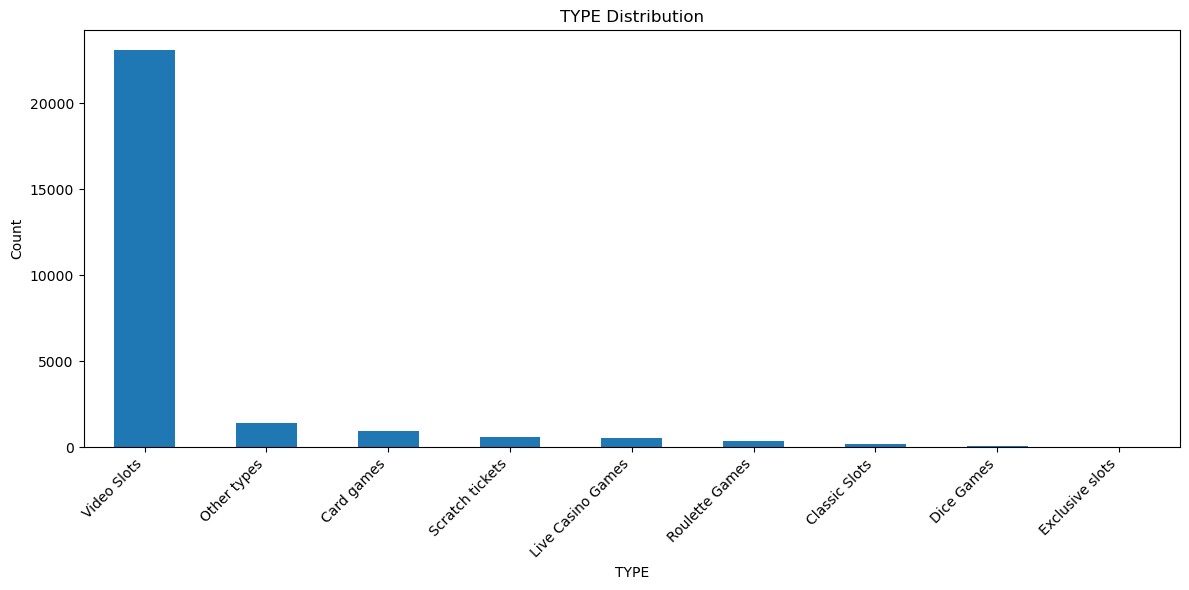


LAYOUT Analysis:
Total unique values: 71
Top 10 most common values:
  5x3: 15079 occurrences (55.26%)
  5x4: 2790 occurrences (10.22%)
  3x3: 2029 occurrences (7.44%)
  5x5: 517 occurrences (1.89%)
  6x4: 508 occurrences (1.86%)
  6x7: 381 occurrences (1.40%)
  3x4: 312 occurrences (1.14%)
  3x1: 294 occurrences (1.08%)
  6x5: 241 occurrences (0.88%)
  4x3: 230 occurrences (0.84%)


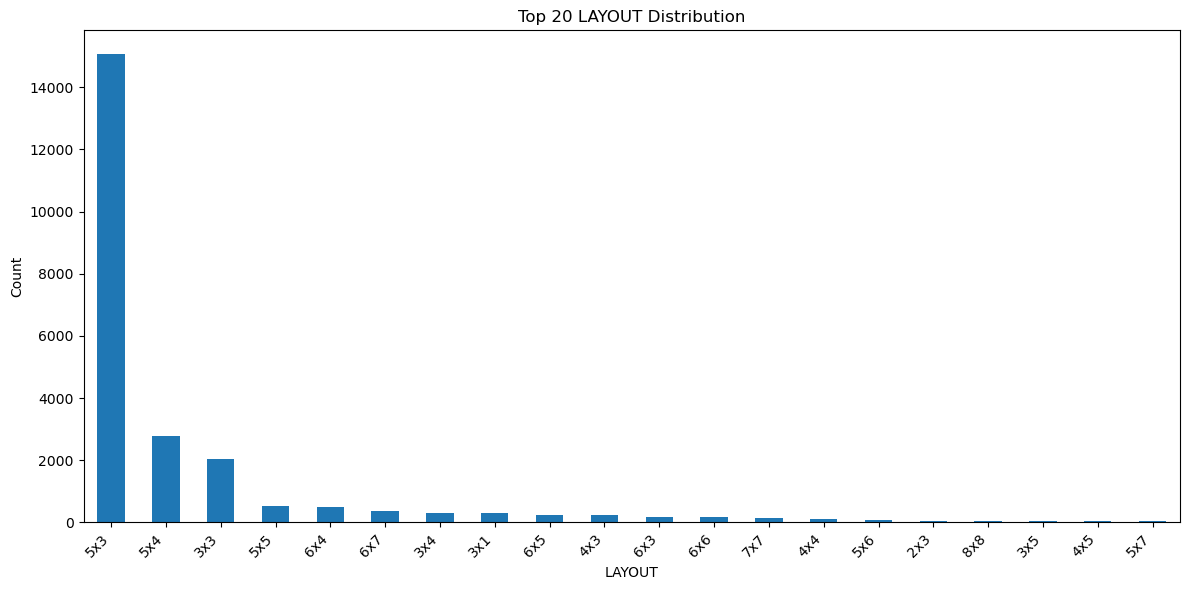


TECHNOLOGY Analysis:
Total unique values: 28
Top 10 most common values:
  JS: 24499 occurrences (89.78%)
  HTML5: 23952 occurrences (87.78%)
  FLASH: 4185 occurrences (15.34%)
  Flash: 650 occurrences (2.38%)
  HTML: 388 occurrences (1.42%)
  HTML 5: 228 occurrences (0.84%)
  JS HTML5: 94 occurrences (0.34%)
  FLASH; JS: 79 occurrences (0.29%)
  JS/HTML5: 23 occurrences (0.08%)
  JS/HTML: 19 occurrences (0.07%)


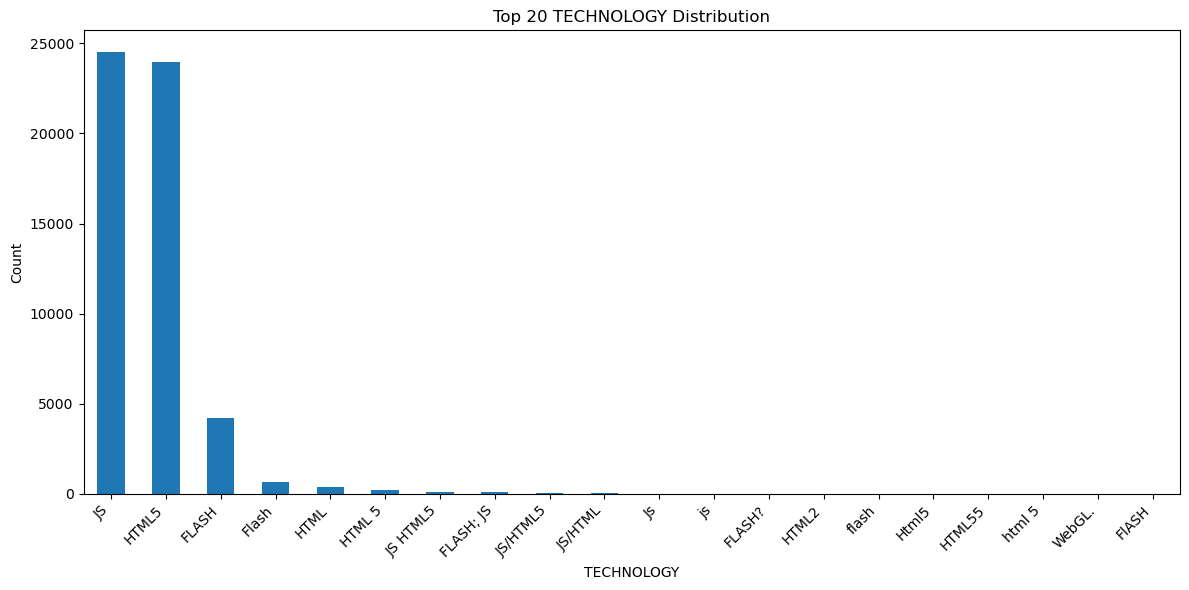


OTHER_TAGS Analysis:
Total unique values: 484
Top 10 most common values:
  Blue: 7460 occurrences (27.34%)
  Green: 6690 occurrences (24.52%)
  Red: 5935 occurrences (21.75%)
  Brown: 5216 occurrences (19.12%)
  Black: 3885 occurrences (14.24%)
  Violet: 3822 occurrences (14.01%)
  Fruit: 2924 occurrences (10.72%)
  Cherry: 2866 occurrences (10.50%)
  Dark blue: 2791 occurrences (10.23%)
  Yellow: 2773 occurrences (10.16%)


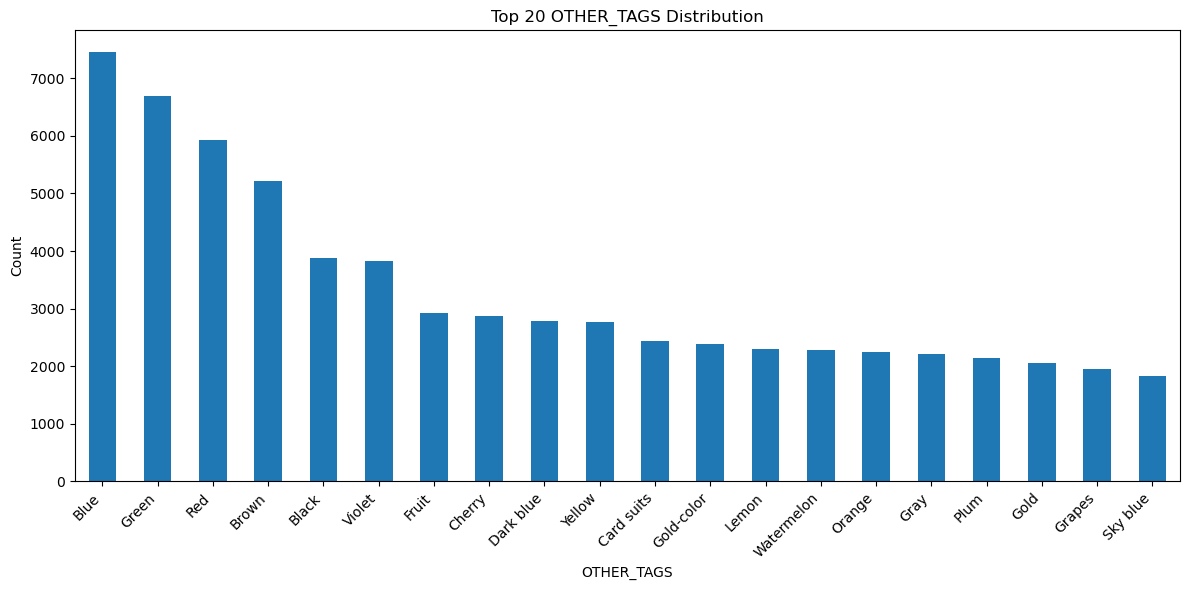


OBJECTS Analysis:
Total unique values: 184
Top 10 most common values:
  Coins: 2297 occurrences (8.42%)
  Star: 1911 occurrences (7.00%)
  Bell: 1822 occurrences (6.68%)
  Diamond: 1779 occurrences (6.52%)
  Weapons: 1237 occurrences (4.53%)
  Treasures: 1072 occurrences (3.93%)
  Book: 889 occurrences (3.26%)
  Money: 855 occurrences (3.13%)
  Sword: 792 occurrences (2.90%)
  Hat: 787 occurrences (2.88%)


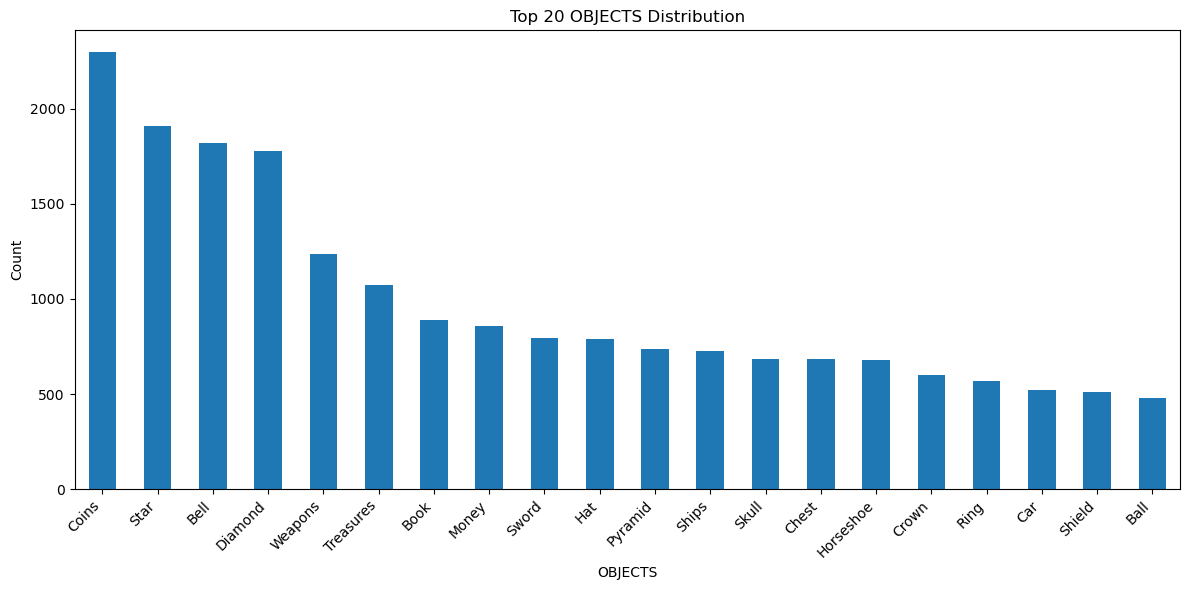


Games with at least one TECHNOLOGY: 27144 (99.48%)

Games with at least one OTHER_TAGS: 26584 (97.42%)

Games with at least one OBJECTS: 16130 (59.11%)


In [16]:
# Analyze distributions for TYPE, LAYOUT, TECHNOLOGY, OTHER_TAGS, OBJECTS

# Function to analyze categorical fields
def analyze_categorical_field(df, field_name):
    if field_name not in df.columns:
        print(f"{field_name} not found in dataframe")
        return
    
    # Check if the field contains lists
    if isinstance(df[field_name].iloc[0], list):
        # Process list fields directly
        all_values = []
        for values_list in df[field_name].dropna():
            if isinstance(values_list, list):
                all_values.extend(values_list)
            else:
                all_values.append(values_list)
        
        value_counts = pd.Series(all_values).value_counts()
    # Check if the field is a list type stored as string
    elif isinstance(df[field_name].iloc[0], str) and df[field_name].iloc[0].startswith('[') and df[field_name].iloc[0].endswith(']'):
        all_values = []
        for values_str in df[field_name].dropna():
            try:
                values = eval(values_str)
                if isinstance(values, list):
                    all_values.extend(values)
                else:
                    all_values.append(values)
            except:
                continue
        
        value_counts = pd.Series(all_values).value_counts()
    else:
        # Process regular fields
        value_counts = df[field_name].value_counts()
    
    print(f"\n{field_name} Analysis:")
    print(f"Total unique values: {len(value_counts)}")
    print(f"Top 10 most common values:")
    
    for value, count in value_counts.head(10).items():
        percentage = (count / len(df)) * 100
        print(f"  {value}: {count} occurrences ({percentage:.2f}%)")
    
    # Visualize distribution
    plt.figure(figsize=(12, 6))
    if len(value_counts) > 20:
        # For fields with many values, show top 20
        value_counts.head(20).plot(kind='bar')
        plt.title(f'Top 20 {field_name} Distribution')
    else:
        # For fields with fewer values, show all
        value_counts.plot(kind='bar')
        plt.title(f'{field_name} Distribution')
    
    plt.xlabel(field_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    return value_counts

# Analyze each field
type_counts = analyze_categorical_field(slot_data, 'TYPE')
layout_counts = analyze_categorical_field(slot_data, 'LAYOUT')
technology_counts = analyze_categorical_field(slot_data, 'TECHNOLOGY')
other_tags_counts = analyze_categorical_field(slot_data, 'OTHER_TAGS')
objects_counts = analyze_categorical_field(slot_data, 'OBJECTS')

# Additional analysis for fields that are lists
for field in ['TECHNOLOGY', 'OTHER_TAGS', 'OBJECTS']:
    # Count how many games have at least one value in this field
    if field in slot_data.columns:
        if isinstance(slot_data[field].iloc[0], list):
            non_empty_count = slot_data[field].apply(lambda x: isinstance(x, list) and len(x) > 0).sum()
        elif isinstance(slot_data[field].iloc[0], str) and slot_data[field].iloc[0].startswith('['):
            non_empty_count = slot_data[field].apply(lambda x: x != '[]' and pd.notna(x)).sum()
        else:
            non_empty_count = slot_data[field].notna().sum()
            
        percentage = (non_empty_count / len(slot_data)) * 100
        print(f"\nGames with at least one {field}: {non_empty_count} ({percentage:.2f}%)")



Technology has duplicates and should be remapped HTML\JS, js, JS, ...

In [17]:
slot_data["LAYOUT"]

0        5x3
1        5x3
2        4x3
3        6x3
4        5x4
        ... 
27282    5x3
27283    NaN
27284    NaN
27285    5x4
27286    NaN
Name: LAYOUT, Length: 27287, dtype: object